<a href="https://colab.research.google.com/github/JLee823/2023-1st-AI-assisted-drug-discovery-SNU/blob/main/Week1_Quick_start_Introduction_to_machine_learning_for_drug_discovery_2023_1st_SNU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
인공 지능 기반 신약 개발 수업에 관심을 가져주셔서 감사합니다. 

1주차에서는 아주 기본적인 머신 러닝의 흐름을 실습해보는 시간을 가지도록 하겠습니다. 

각 코드의 자세한 내용은 앞으로 수업이 진행되면서 조금 더 자세히 설명하도록 하겠습니다. 

------


# Predicting activity of JAK2 inhibitors
## Goal of the class
* Practice the **regression model** using biological data

## Janus kinase
Janus kinase (JAK) is a family of intracellular, non-receptor tyrosine kinases that transduce cytokine-mediated signals via the JAK-STAT pathway. They were initially named "just another kinase" 1 and 2 (since they were just two of many discoveries in a PCR-based screen of kinases),[1] but were ultimately published as "Janus kinase". The name is taken from the two-faced Roman god of beginnings, endings and duality, Janus, because the JAKs possess two near-identical phosphate-transferring domains. One domain exhibits the kinase activity, while the other negatively regulates the kinase activity of the first.

![picture](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Protein_JAK2_PDB_2b7a.png/500px-Protein_JAK2_PDB_2b7a.png)

## Part1 - Collecting activity data of JAK2
-----

JAK2의 activity data는 [ChEMBL](https://www.ebi.ac.uk/chembl/) 사이트에서 받을 수 있다. 




<img width="500" src="https://www.dropbox.com/s/h1k4sr23qu93dit/ChEMBL1.png?raw=1">

<img width="500" src="https://www.dropbox.com/s/4lb5d853ut2mxtg/ChEMBL2.png?raw=1">

Assay로 search를 하면 다양한 compound assay 실험 결과 데이터를 검색할 수 있다. 

<img width="500" src="https://www.dropbox.com/s/790whkk92wv0ssw/ChEMBL3.png?raw=1">

검색 결과 다양한 assay결과들이 검색되었다. 

각 assay 데이터를 다운 받아서 통합하는 일이 필요하다...... 

자세한 것은 차차 다루도록 한다.

In [1]:
import pandas as pd

데이터를 다루기 위해서 Pandas 라이브러리를 import 한다. 

https://pandas.pydata.org/

Pandas 라이브러리는 colab 이나 Jupyter notebook에서 excel과 유사하게 데이터를 다룰 수 있도록 해주는 library이다. 

Pandas에 대한 자세한 설명은 아래의 Pandas tutorial을 참고해주시길 바랍니다. 

https://pandas.pydata.org/docs/user_guide/10min.html

https://codetorial.net/pandas/index.html



In [14]:
df_raw = pd.read_csv("jak2_data.csv")

### Inhibitory concentration 50 ( $\mathrm{IC_{50}}$ )
The **half maximal inhibitory concentration (IC50)** is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. 

IC50 is a quantitative measure that indicates **how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.** 

The biological component could be an enzyme, cell, cell receptor or microorganism. IC50 values are typically expressed as molar concentration.

**In general, the IC50 value of a typical drug is in a range of nM ~ $\mu$M.**

$\mathrm{pIC50} = -\log_{10}(\mathrm{IC50})$

**Thus, molecules with higher pIC50 are stronger binders.**

<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/8/81/Example_IC50_curve_demonstrating_visually_how_IC50_is_derived.png">

pandas에서 CSV 파일을 읽어들이면 DataFrame이라는 Class로 저장된다.

In [15]:
df_raw

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [16]:
df_raw.describe()

,pIC50
count,1911.000000
mean,7.391544
std,1.180905
min,4.260000
25%,6.650000
50%,7.380000
75%,8.100000
max,10.970000


1911개의 활성도 데이터가 존재한다. 

### 중복된 row 제거 
------
중복되는 데이터가 존재할 수 있으므로 중복되는 행을 삭제하자. 

In [17]:
df = df_raw.drop_duplicates()

In [19]:
df.describe()

,pIC50
count,1902.000000
mean,7.386887
std,1.181605
min,4.260000
25%,6.650000
50%,7.380000
75%,8.080000
max,10.970000


데이터의 분포를 히스토그램으로 그려보자. 

array([[<AxesSubplot:title={'center':'pIC50'}>]], dtype=object)

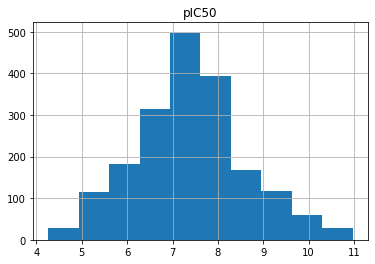

In [20]:
df.hist("pIC50")

## Part2 - Featurization of molecules

--------

분자의 물성을 컴퓨터 알고리즘을 이용해서 예측하기 위해서는 분자를 컴퓨터가 읽어들이기 좋은 형태(벡터, 텐서)의 형태로 바꾸어 주어야 한다. 



<img width=500 src="https://static.wixstatic.com/media/cf17e0_d4fa36bf83c7490aa749eee5bd6a5073~mv2.png/v1/fit/w_1000%2Ch_563%2Cal_c/file.png">

<img width=500 src="https://pyojuncode.github.io/static/8e01a362b96ea33d6b8855e9d5fd74e9/ecf19/fe.png">

### Molecular descriptors
-------
* 이 예제에서는 분자의 특징을 다음과 같은 물리화학적 물성으로 나타낸다.  
1. Molecular Weight
2. Number of hydrogen bond acceptors. 
3. Number of hydrogen bond donors. 
4. logP
5. fraction of SP3 hybridized carbon (sp3 혼성을 가지는 탄소의 개수)
6. Number of rotatable bond. 
7. Number of rings. 
8. TPSA: polar surface area. (분자의 표면적 넓이, 단위: A^2)
9. Number of Aramatic Rings (방향성 고리의 개수)

### RDKit library
-------

[RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html)은 분자를 파이썬을 이용해서 다룰 수 있도록 해주는 화학정보학 라이브러리이다. 

<img width=500 src="https://www.dropbox.com/s/q7gqs8jeep0g5w2/rdkit_front.png?raw=1">

rdkit 라이브러리는 pip을 이용해서 설치 가능하다. 

In [21]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 60.6 MB/s eta 0:00:00


In [27]:
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem

In [30]:
# Descriptor를 계산하는 함수를 불러오자. 
from rdkit.Chem.rdMolDescriptors import (
    CalcExactMolWt, # 분자량
    CalcCrippenDescriptors, # logP
    CalcNumLipinskiHBA, 
    CalcNumLipinskiHBD, 
    CalcFractionCSP3, 
    CalcNumRotatableBonds, 
    CalcNumRings, 
    CalcTPSA, 
    CalcNumAromaticRings
)

# empty dictionary for pandas
properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "pIC50": []}

for idx, smiles in enumerate(df["SMILES"]): # Smiles 열에서 반복.
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: # if molecule is not valid. mol안에 None이 들어있으면 문제가 있는 것!
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["pIC50"].append(df["pIC50"].iloc[idx])

In [32]:
print(properties)

{'MW': [367.04491865600005, 506.12676797000006, 317.17394159599996, 301.190260356, 294.093917448, 289.1215121, 315.100776656, 371.10366911599994, 461.10702197200004, 450.14740956400004, 294.148061196, 299.0728476560001, 316.189926008, 288.101111004, 423.20591042000007, 539.2114870400001, 373.14695157200003, 385.16693806800004, 404.092770084, 371.15128800400004, 355.112090288, 357.13563794000004, 281.1276601, 389.14186619200007, 384.14653697200004, 377.14092721599997, 317.173941596, 389.14186619200007, 308.12488114, 418.1441186880001, 328.096025624, 560.1979038480001, 394.21172407200004, 469.15501772, 415.177502752, 372.13530359200007, 493.18960872400004, 384.11979576000004, 316.132411132, 373.15387484800004, 373.15387484800004, 449.1521605960001, 457.08784608800005, 399.20591042000007, 367.1756729120001, 354.144038436, 323.18584367200003, 353.196408356, 530.1711797, 530.1711797, 381.1953457360001, 399.20591042000007, 567.2457245439999, 558.241309948, 443.2433585480001, 376.164773880000